In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import yaml
import sys
import os
%matplotlib inline

In [26]:
libraries = (('Matplotlib', mpl), ('Numpy', np), 
                ('Sklearn', sklearn), ('Seaborn', sns), 
            ('Pandas', pd))

print("Python version:", sys.version, '\n')
for lib in libraries:
    print('{0} version: {1}'.format(lib[0], lib[1].__version__))

Python version: 3.7.4 (default, Jul  9 2019, 18:13:23) 
[Clang 10.0.1 (clang-1001.0.46.4)] 

Matplotlib version: 3.0.1
Numpy version: 1.15.3
Sklearn version: 0.20.0
Seaborn version: 0.9.0
Pandas version: 0.23.4


In [27]:
# Collect data for visualization
def getData(path):
    data = []
    cpu = []
    for i in range(1,8):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("AB"+str(i),'.yaml'))))))
        if(data[i-1]['placement']['alloc_node_res'][2]['name'] != 'vnf_user'):
            cpu.append(data[i-1]['placement']['alloc_node_res'][2]['cpu'])
        else:
            cpu.append(data[i-1]['placement']['alloc_node_res'][1]['cpu'])
    return cpu

In [28]:
# Collect placement data
def getPlacementData(path):
    data = []
    placement = []
    for i in range(1,8):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("AB"+str(i),'.yaml'))))))
        placement.append(data[i-1]['placement']['vnfs'][0]['name']+":"+data[i-1]['placement']['vnfs'][0]['node'])
        placement.append(data[i-1]['placement']['vnfs'][1]['name']+":"+data[i-1]['placement']['vnfs'][1]['node'])
        placement.append(data[i-1]['placement']['vnfs'][2]['name']+":"+data[i-1]['placement']['vnfs'][2]['node'])
    return placement

In [30]:
# Data rate vars
default = []
groundTruth = []
linear = []
xgboost = []
randomForest = []
gradient = []
ridge = []
svm = []

# Placement vars
P_default = []
P_groundTruth = []
P_linear = []
P_xgboost = []
P_randomForest = []
P_gradient = []
P_ridge = []
P_svm = []

dataRate = [50, 100, 150, 200, 250, 300, 350] # Input data rate

# get predicted CPU data
groundTruth = getData('DataForVis/inv')
linear = getData('DataForVis/linear')
xgboost = getData('DataForVis/xgb')
gradient = getData('DataForVis/gb')
svm = getData('DataForVis/svm')
ridge = getData('DataForVis/ridge')
randomForest = getData('DataForVis/ridge')


# get placement data
P_groundTruth = getPlacementData('DataForVis/inv')
P_linear = getPlacementData('DataForVis/linear')
P_xgboost = getPlacementData('DataForVis/xgb')
P_gradient = getPlacementData('DataForVis/gb')
P_svm = getPlacementData('DataForVis/svm')
P_ridge = getPlacementData('DataForVis/ridge')
P_randomForest = getPlacementData('DataForVis/ridge')


# Print data rates
print("-------------CPU Info--------------\n")

for i in range(0,7):
    print("------------DATA RATE:",dataRate[i],"---------------\n")
    print("Ground Truth:", groundTruth[i]*2,"\n")
    print("Linear:", linear[i]*2,"\n")
    print("XGBoost:", xgboost[i]*2,"\n")


    
# Print Placement Info  
print("-------------Placement Info--------------\n")

for i in range(0,7):
    print("------------DATA RATE:",dataRate[i],"---------------\n")
    i *= 3
    print("Ground Truth:", P_groundTruth[i],P_groundTruth[i+1],P_groundTruth[i+2],"\n")
    print("Linear:", P_linear[i],P_linear[i+1],P_linear[i+2],"\n")
    print("XGBoost:", P_xgboost[i], P_xgboost[i+1], P_xgboost[i+2],"\n")

    


-------------CPU Info--------------

------------DATA RATE: 50 ---------------

Ground Truth: 0.8284271247461903 

Linear: -2.43324923062672 

XGBoost: 0.7243307828903198 

------------DATA RATE: 100 ---------------

Ground Truth: 2.0 

Linear: 0.8059143514847307 

XGBoost: 2.011443853378296 

------------DATA RATE: 150 ---------------

Ground Truth: 3.6568542494923806 

Linear: 4.045077933596181 

XGBoost: 3.521840810775757 

------------DATA RATE: 200 ---------------

Ground Truth: 6.0 

Linear: 7.284242199546227 

XGBoost: 5.706658840179443 

------------DATA RATE: 250 ---------------

Ground Truth: 9.313708498984761 

Linear: 10.523406465496274 

XGBoost: 8.905525207519531 

------------DATA RATE: 300 ---------------

Ground Truth: 14.0 

Linear: 13.76256936376913 

XGBoost: 13.484475135803223 

------------DATA RATE: 350 ---------------

Ground Truth: 20.627416997969522 

Linear: 17.001733629719176 

XGBoost: 19.656932830810547 

-------------Placement Info--------------

--------

## Visualization
##### Some nice plots

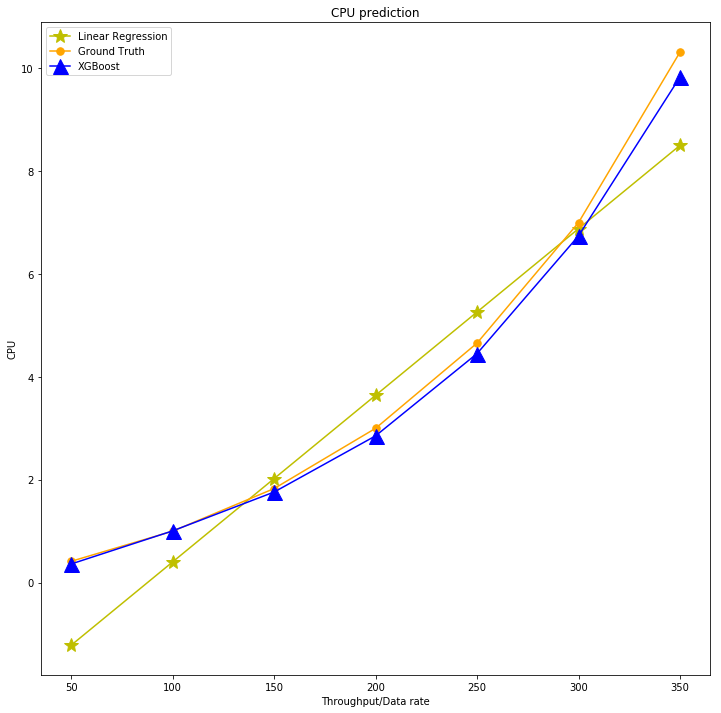

In [9]:
# data rate vs CPU
fig = plt.figure(figsize=(12, 12))

plt.plot(dataRate, linear, color='y', marker="*", markersize=15, label="Linear Regression")
plt.plot(dataRate, groundTruth, color='orange', marker=".", markersize=15, label="Ground Truth")
plt.plot(dataRate, xgboost, color='b',marker="^", markersize=15, label="XGBoost")



plt.xlabel('Throughput/Data rate')
plt.ylabel('CPU')
plt.title('CPU prediction')
plt.legend()
plt.show()

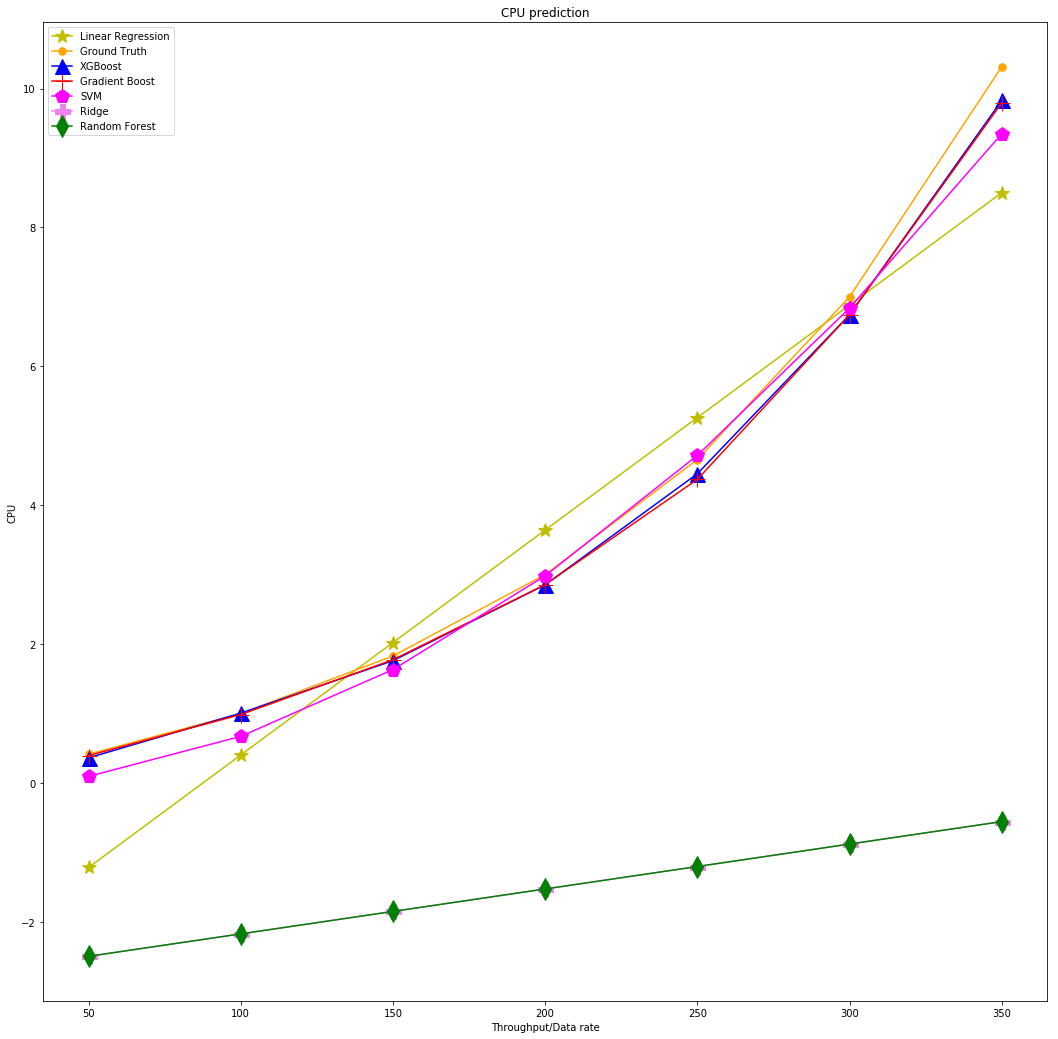

In [7]:
# data rate vs CPU
fig = plt.figure(figsize=(18, 18))

plt.plot(dataRate, linear, color='y', marker="*", markersize=15, label="Linear Regression")
plt.plot(dataRate, groundTruth, color='orange', marker=".", markersize=15, label="Ground Truth")
plt.plot(dataRate, xgboost, color='b',marker="^", markersize=15, label="XGBoost")
plt.plot(dataRate, gradient, color='r',marker="+", markersize=15, label="Gradient Boost")
plt.plot(dataRate, svm, color='magenta',marker="p", markersize=15, label="SVM")
plt.plot(dataRate, ridge, color='violet',marker="P", markersize=15, label="Ridge")
plt.plot(dataRate, randomForest, color='green',marker="d", markersize=15, label="Random Forest")


plt.xlabel('Throughput/Data rate')
plt.ylabel('CPU')
plt.title('CPU prediction')
plt.legend()
plt.show()